Register for an account:
 - https://data.marine.copernicus.eu/register

Learn how to configure your access in python
 - https://help.marine.copernicus.eu/en/articles/6135460-how-to-configure-a-simple-opendap-access-directly-in-python
   
Links:
 - https://data.marine.copernicus.eu/viewer
 - https://data.marine.copernicus.eu/product/SEALEVEL_GLO_PHY_L4_NRT_OBSERVATIONS_008_046/services

In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import copernicusmarine

In [2]:
plt.rcParams['font.size']=14
plt.rcParams['axes.labelsize']='medium'

In [3]:
copernicusmarine.login()

username:

  mrayson


password:

  ········


File /home/jupyter-mrayson/.copernicusmarine/.copernicusmarine-credentials already exists, overwrite it ? [y/N]:

  y


INFO - 2024-10-30T06:18:55Z - Credentials file stored in /home/jupyter-mrayson/.copernicusmarine/.copernicusmarine-credentials.


True

In [5]:
#SEALEVEL_GLO_PHY_L4_MY_008_047
# Dataset ID
# DATASET_ID = "cmems_mod_glo_phy-thetao_anfc_0.083deg_P1D-m"
# DATASET_ID = 'dataset-duacs-nrt-global-merged-allsat-phy-l4'
#DATASET_ID = 'cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1M-m'
DATASET_ID = 'cmems_obs-sl_glo_phy-ssh_nrt_allsat-l4-duacs-0.25deg_P1D'
ds_ssh = copernicusmarine.open_dataset(dataset_id = DATASET_ID)
ds_ssh

INFO - 2024-10-30T06:20:33Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-10-30T06:20:33Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-10-30T06:20:37Z - Service was not specified, the default one was selected: "arco-geo-series"


<xarray.Dataset>
Dimensions:    (time: 1034, latitude: 720, longitude: 1440, nv: 2)
Coordinates:
    lat_bnds   (latitude, nv) float32 ...
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
    lon_bnds   (longitude, nv) float32 ...
  * longitude  (longitude) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * nv         (nv) int32 0 1
  * time       (time) datetime64[ns] 2022-01-01 2022-01-02 ... 2024-10-30
Data variables:
    adt        (time, latitude, longitude) float64 ...
    err_sla    (time, latitude, longitude) float64 ...
    err_ugosa  (time, latitude, longitude) float64 ...
    err_vgosa  (time, latitude, longitude) float64 ...
    flag_ice   (time, latitude, longitude) float64 ...
    sla        (time, latitude, longitude) float64 ...
    ugos       (time, latitude, longitude) float64 ...
    ugosa      (time, latitude, longitude) float64 ...
    vgos       (time, latitude, longitude) float64 ...
    vgosa      (time, latitude, longitude) float64 ...
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Near-Real-Time Level-4 sea ...
    time_coverage_duration:          P1D
    time_coverage_end:               2023-11-24T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2023-11-23T12:00:00Z
    title:                           NRT merged all satellites Global Ocean G...

In [12]:
# Subsetting parameters
TIME = slice('2023-03-01', '2023-07-31')
DEPTH = 0
x1,x2=121,125
y1,y2=-15.5,-12
LONGITUDE = slice(x1,x2)
LATITUDE = slice(y1,y2)

# Read product via OPeNDAP
DS = ds_ssh.sel(time=TIME, latitude=LATITUDE, longitude=LONGITUDE)
DS

<xarray.Dataset>
Dimensions:    (time: 153, latitude: 14, longitude: 16, nv: 2)
Coordinates:
    lat_bnds   (latitude, nv) float32 ...
  * latitude   (latitude) float32 -15.38 -15.12 -14.88 ... -12.62 -12.38 -12.12
    lon_bnds   (longitude, nv) float32 ...
  * longitude  (longitude) float32 121.1 121.4 121.6 121.9 ... 124.4 124.6 124.9
  * nv         (nv) int32 0 1
  * time       (time) datetime64[ns] 2023-03-01 2023-03-02 ... 2023-07-31
Data variables:
    adt        (time, latitude, longitude) float64 ...
    err_sla    (time, latitude, longitude) float64 ...
    err_ugosa  (time, latitude, longitude) float64 ...
    err_vgosa  (time, latitude, longitude) float64 ...
    flag_ice   (time, latitude, longitude) float64 ...
    sla        (time, latitude, longitude) float64 ...
    ugos       (time, latitude, longitude) float64 ...
    ugosa      (time, latitude, longitude) float64 ...
    vgos       (time, latitude, longitude) float64 ...
    vgosa      (time, latitude, longitude) float64 ...
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Near-Real-Time Level-4 sea ...
    time_coverage_duration:          P1D
    time_coverage_end:               2023-11-24T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2023-11-23T12:00:00Z
    title:                           NRT merged all satellites Global Ocean G...

In [14]:
%%time
DS.to_netcdf('../DATA/l4-duacs-0.25deg_P1D_sla_BrowseBasin.nc')

CPU times: user 9.63 s, sys: 2.74 s, total: 12.4 s
Wall time: 15min 31s


In [8]:
# plt.figure(figsize=(10,5))
# DS['sla'].isel(time=0).plot()

In [9]:
from utils import plot_swot_basemap

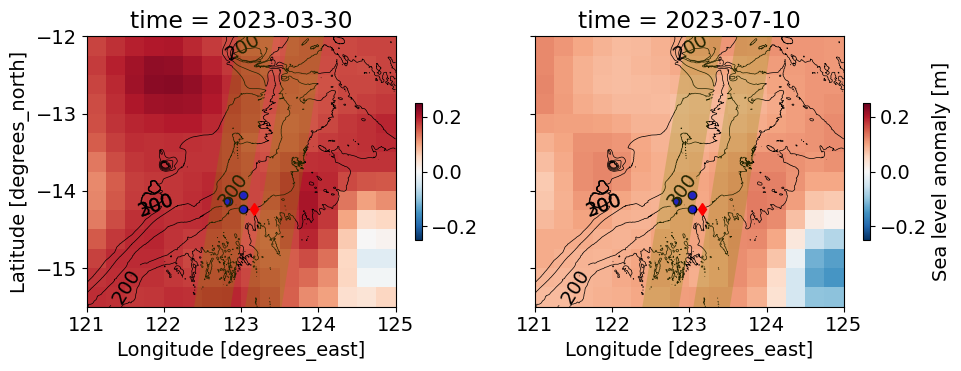

In [10]:
plt.figure(figsize=(10,5))
ax=plt.subplot(121)
DS['sla'].isel(time=0).plot(vmin=-0.25, vmax=0.25, cmap='RdBu_r', cbar_kwargs={"shrink": 0.3,'label':''},)
c=plot_swot_basemap(ax, (x1,x2), (y1,y2))
plt.clabel(c, levels=(200,300))

ax2=plt.subplot(122)
DS['sla'].isel(time=-1).plot(vmin=-0.25, vmax=0.25, cmap='RdBu_r', cbar_kwargs={"shrink": 0.3},)
c=plot_swot_basemap(ax2, (x1,x2), (y1,y2))
ax2.set_yticklabels([])
ax2.set_ylabel('')
plt.clabel(c, levels=(200,300))
plt.tight_layout()
#plt.savefig('../FIGURES/SSALTO_DUACS_AllSat_L4.png',dpi=150)

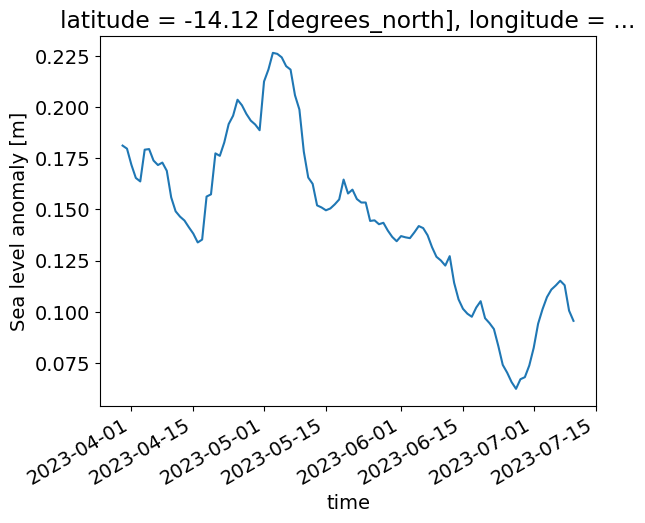

In [11]:
# Plot a time series
TS = DS.sel(longitude=122.8370658081835, latitude=-14.13718816307405, method='nearest')
TS['sla'].plot()

In [6]:
# ds_ssh = xr.open_dataset('https://my.cmems-du.eu/thredds/dodsC/cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1M-m')
# ds_ssh

In [ ]:
plt.figure(figsize=(10,5))
ax=plt.subplot(111)
ds_ssh['sla'].sel(time='2022-07-15').plot(vmin=-0.5, vmax=0.5, cmap='RdBu_r')
ax.set_xlim(10, 140)
ax.set_ylim(-60, 40)